In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Preliminary
Checking the difference in PSDs between both experiments

In [170]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
ami = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_ami.npy')
    ami.append(df_participant)
ami = np.stack(ami)
ami = pd.DataFrame(ami, columns=['60 & attention_type_block==0',
                                '64 & attention_type_block==0',
                                '60 & attention_type_block==1',
                                '64 & attention_type_block==1'])
# ami = ami.mean(axis=0)
ami['participant'] = participants
ami = ami.melt(id_vars='participant')

split_data = ami['variable'].str.split(' & ', expand=True)
ami['frequency'] = split_data[0]
ami['attention'] = split_data[1].str.split('==').str[1]
ami = ami.drop(columns=['variable'])
# Average over stimulation frequencies
ami = ami.groupby(['participant','attention']).value.mean().reset_index()
ami['Attention'] = ami['attention'].replace({'0': 'Exogenous', '1': 'Endogenous'})
ami = ami.drop(columns=['attention'])
ami['Experiment'] = 2
# ADD expe 1
participants = ['A0', 'A1', 'A2'] 
ami_exp1 = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_ami.npy')
    ami_exp1.append(df_participant)
ami_exp1 = np.stack(ami_exp1)
ami_exp1 = pd.DataFrame(ami_exp1, columns=['60','56'])

# ami = ami.mean(axis=0)
ami_exp1['participant'] = participants
ami_exp1 = ami_exp1.melt(id_vars='participant')
ami_exp1
# split_data = ami['variable'].str.split(' & ', expand=True)
# ami['frequency'] = split_data[0]
# ami['attention'] = split_data[1].str.split('==').str[1]
# ami = ami.drop(columns=['variable'])
# # Average over stimulation frequencies
ami_exp1 = ami_exp1.groupby(['participant']).value.mean().reset_index()
ami_exp1['Attention'] = 'Endogenous'
ami_exp1['Experiment'] = 1

In [171]:
combined = pd.concat([ami, ami_exp1])

Text(50.87591049382715, 0.5, 'Attention modulation index')

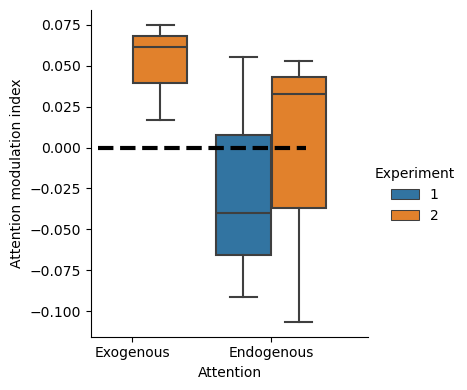

In [172]:
sns.catplot(y='value', x='Attention',  hue='Experiment',
            data=combined, kind='box',  height=4)
plt.hlines(0, -.25, 1.25, color='black', ls='--', lw=3)
# plt.xlim(-.25, 1.25)
plt.ylabel('Attention modulation index')

Text(49.828341049382715, 0.5, 'Attention modulation index')

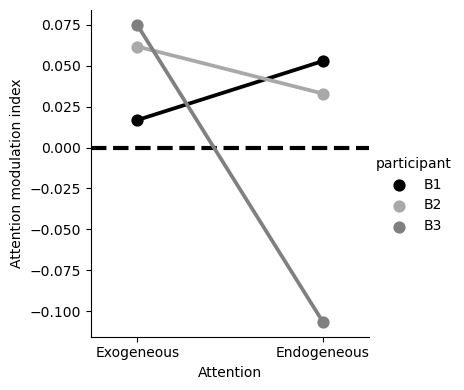

In [108]:
sns.catplot(y='value', x='Attention', hue='participant',
            data=ami, kind='point', palette=['black','darkgrey','grey'], height=4,)
plt.hlines(0, -.25, 1.25, color='black', ls='--', lw=3)
plt.xlim(-.25, 1.25)
plt.ylabel('Attention modulation index')

In [117]:
# snrs 
participants = ['A0', 'A1', 'A2'] 
path_exp1 = '/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1/notebooks/'

ami = []
for participant in participants:
    df_participant = np.load(f'{path_exp1}files/{participant}_ami.npy')
    ami.append(df_participant)
ami = np.stack(ami)
ami = pd.DataFrame(ami, columns=['60','56'])

# ami = ami.mean(axis=0)
ami['participant'] = participants
ami = ami.melt(id_vars='participant')
ami
# split_data = ami['variable'].str.split(' & ', expand=True)
# ami['frequency'] = split_data[0]
# ami['attention'] = split_data[1].str.split('==').str[1]
# ami = ami.drop(columns=['variable'])
# # Average over stimulation frequencies
ami = ami.groupby(['participant']).value.mean().reset_index()
ami

,participant,value
0,A0,0.055267
1,A1,-0.091394
2,A2,-0.039701


TypeError: 'NoneType' object is not iterable

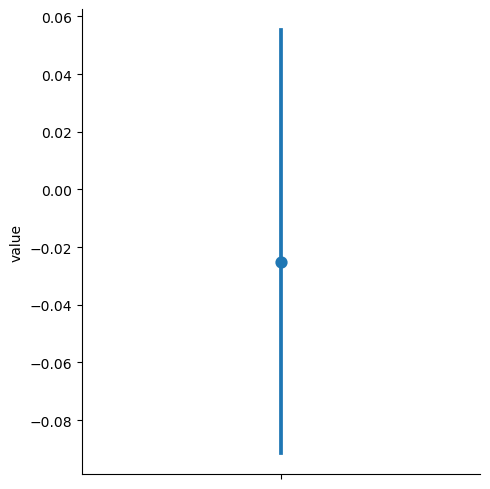

In [118]:
sns.catplot(y='value', hue='participant',
            data=ami, kind='point',)# palette=['black','darkgrey','grey'], height=4,)
plt.hlines(0, -.25, 1.25, color='black', ls='--', lw=3)
plt.xlim(-.25, 1.25)
plt.ylabel('Attention modulation index')

In [87]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
ami = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_ami.npy')
    ami.append(df_participant)
ami = np.stack(ami)
ami = pd.DataFrame(ami, columns=['60 & attention_type_block==0',
                                '64 & attention_type_block==0',
                                '60 & attention_type_block==1',
                                '64 & attention_type_block==1'])
# ami = ami.mean(axis=0)
ami['participant'] = participants
ami = ami.melt(id_vars='participant')

split_data = ami['variable'].str.split(' & ', expand=True)
ami['frequency'] = split_data[0]
ami['attention'] = split_data[1].str.split('==').str[1]
ami = ami.drop(columns=['variable'])
# Average over stimulation frequencies
ami = ami.groupby(['participant','attention']).value.mean().reset_index()

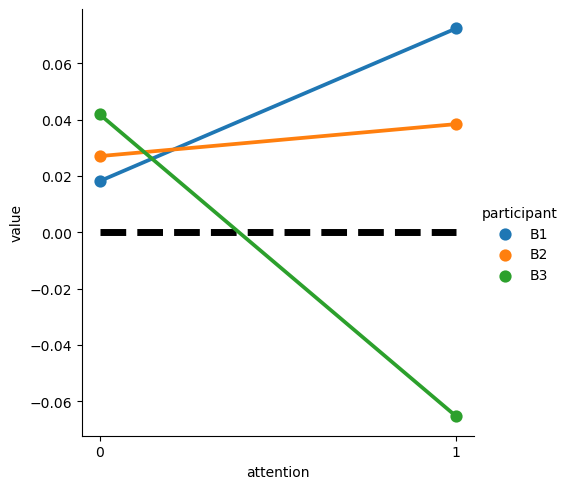

In [88]:
sns.catplot(y='value', x='attention', hue='participant',
            data=ami, kind='point', aspect=1)
plt.hlines(0, 0, 1, color='black', ls='--', lw=5)

In [167]:
participants = ['B1', 'B2', 'B3'] 

ITcoh_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh_exp2.append(df_participant)
ITcoh_exp2 = pd.concat(ITcoh_exp2)
ITcoh_exp2['cued_group'] = (ITcoh_exp2['coh_with'] == ITcoh_exp2['cued'])
#Average over electrodes
# ITcoh_exp2 = ITcoh_exp2[(ITcoh_exp2.coh_with == 60) & (ITcoh_exp2.cued == 60)]
ITcoh_exp2 = ITcoh_exp2.groupby(['participant','condition','time','cued_group']).ITcoherence.mean().reset_index()
# ITcoh_exp2['Experiment'] = 2 
# ITcoh_exp2 = ITcoh_exp2[ITcoh_exp2.cued == True] 
ITcoh_exp2


,participant,condition,time,cued_group,ITcoherence
0,B1,endo,-0.500000,False,-2.716521
1,B1,endo,-0.500000,True,-2.676875
2,B1,endo,-0.499512,False,-2.702747
3,B1,endo,-0.499512,True,-2.665880
4,B1,endo,-0.499023,False,-2.689001
...,...,...,...,...,...
36871,B3,exo,0.999023,True,-2.291608
36872,B3,exo,0.999512,False,-2.727742
36873,B3,exo,0.999512,True,-2.306370
36874,B3,exo,1.000000,False,-2.744250


In [168]:
diff_coh = pd.merge(ITcoh_exp2[ITcoh_exp2.cued_group == True],
                    ITcoh_exp2[ITcoh_exp2.cued_group == False], 
                    on=['condition', 'time', 'participant'], suffixes=('_1', '_2'))

# Calculate the difference in ITcoherence
diff_coh['ITcoherence_diff'] = diff_coh['ITcoherence_2'] - diff_coh['ITcoherence_1']
diff_coh

,participant,condition,time,cued_group_1,ITcoherence_1,cued_group_2,ITcoherence_2,ITcoherence_diff
0,B1,endo,-0.500000,True,-2.676875,False,-2.716521,-0.039646
1,B1,endo,-0.499512,True,-2.665880,False,-2.702747,-0.036867
2,B1,endo,-0.499023,True,-2.654910,False,-2.689001,-0.034091
3,B1,endo,-0.498535,True,-2.643965,False,-2.675285,-0.031320
4,B1,endo,-0.498047,True,-2.633047,False,-2.661599,-0.028552
...,...,...,...,...,...,...,...,...
18433,B3,exo,0.998047,True,-2.262172,False,-2.678313,-0.416141
18434,B3,exo,0.998535,True,-2.276875,False,-2.694773,-0.417897
18435,B3,exo,0.999023,True,-2.291608,False,-2.711250,-0.419641
18436,B3,exo,0.999512,True,-2.306370,False,-2.727742,-0.421372


/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

<Axes: xlabel='time', ylabel='ITcoherence_diff'>

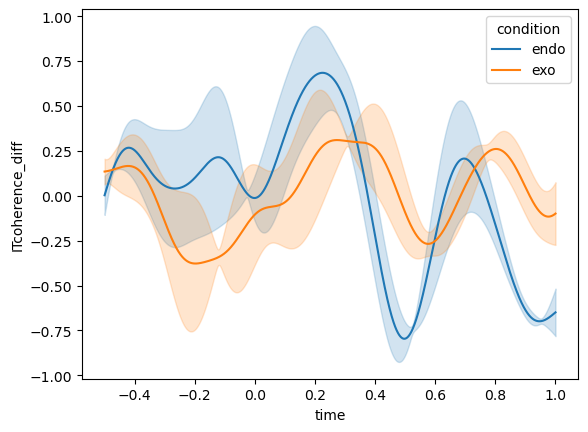

In [169]:
sns.lineplot(y='ITcoherence_diff', hue='condition', x='time', data=diff_coh, errorbar='se')

In [10]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
snrs_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_by-trial_diff-to-baseline_no-split-attention.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp2.append(df_participant)
snrs_exp2 = pd.concat(snrs_exp2)
snrs_exp2['cued_group'] = (snrs_exp2['freq'] == snrs_exp2['cued_tag'])

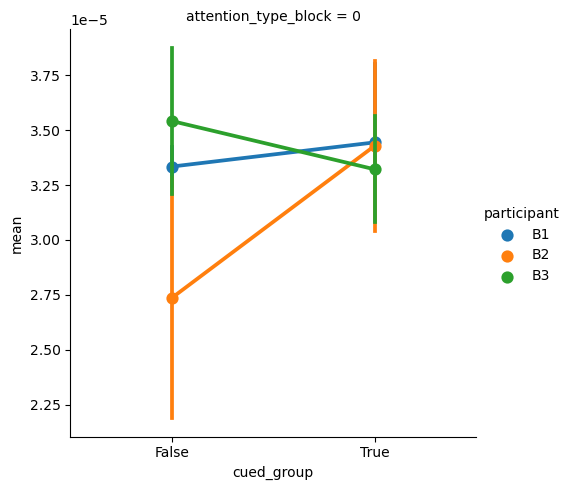

In [89]:
sns.catplot(y='mean', x='cued_group', col='attention_type_block',  hue='participant',
            data=snrs_exp2, kind='point')

In [90]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
snrs_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_trialaveraged_diff-to-baseline_no-split-attention.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp2.append(df_participant)
snrs_exp2 = pd.concat(snrs_exp2)
snrs_exp2['cued_group'] = (snrs_exp2['freq'] == snrs_exp2['cued_tag'])

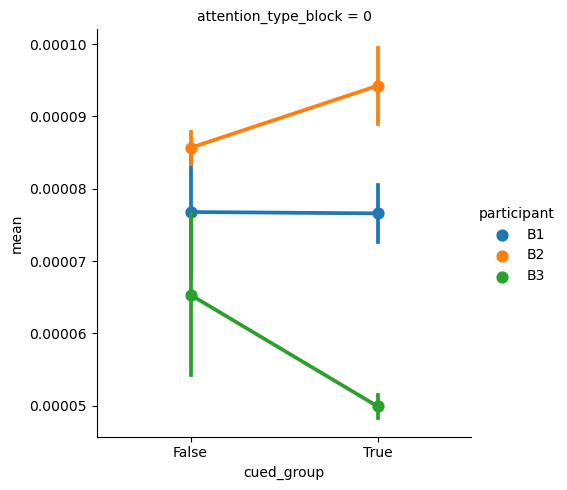

In [91]:
sns.catplot(y='mean', x='cued_group', col='attention_type_block',  hue='participant',
            data=snrs_exp2, kind='point')

In [57]:
participants = ['B1', 'B2','B3'] 
column_names = [
    '60cued_tag_60_attention_0',
    '60cued_tag_64_attention_0',
    '60cued_tag_60_attention_1',
    '60cued_tag_64_attention_1',
    '64cued_tag_60_attention_0',
    '64cued_tag_64_attention_0',
    '64cued_tag_60_attention_1',
    '64cued_tag_64_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_bytrial_diff-to-baseline.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    npsds.append(df_participant)
npsds = pd.concat(npsds)
npsds['Frequency'] = df_participant['variable'].str[:2]
npsds['Cued tag'] = df_participant['variable'].str[11:13]
npsds['Attention'] = df_participant['variable'].str[-1]
npsds['cued_group'] = (npsds['Frequency'] == npsds['Cued tag'])

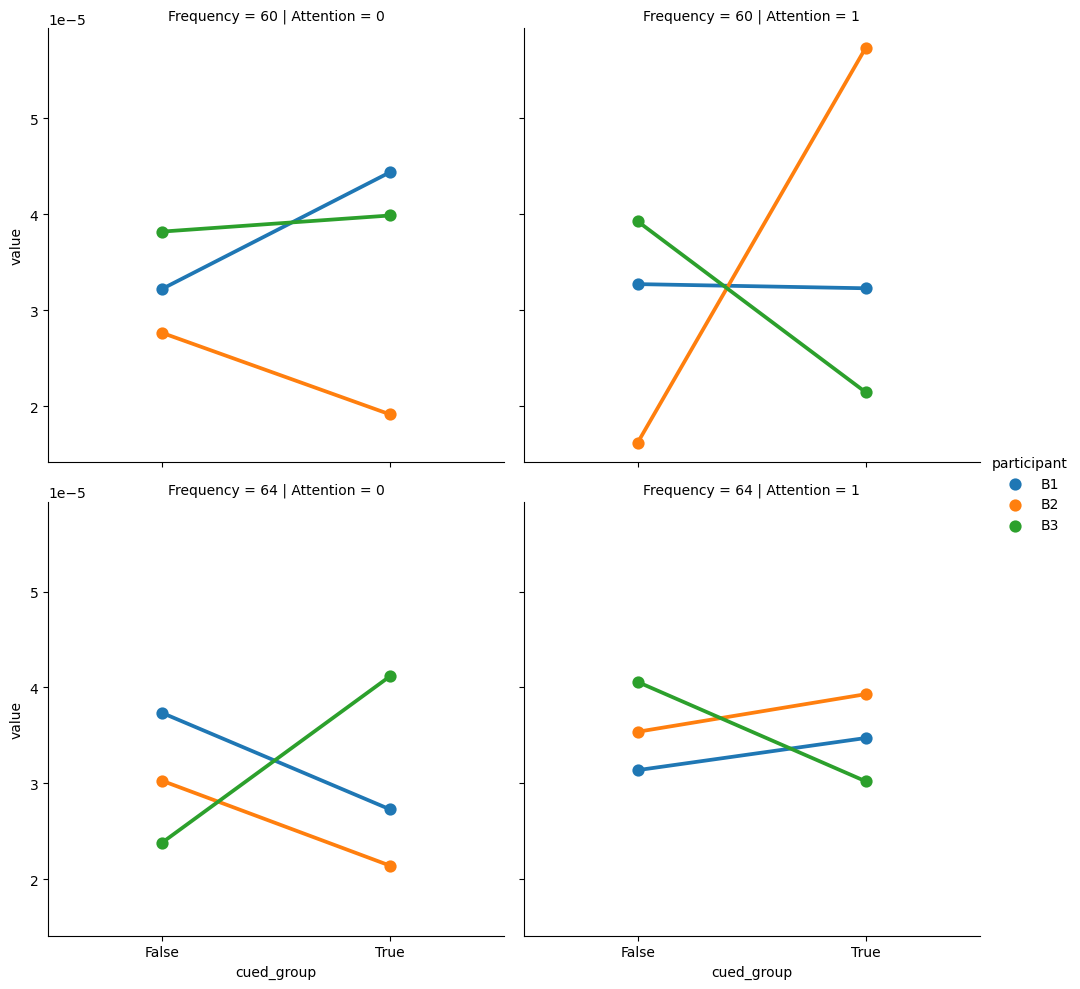

In [58]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant',  row='Frequency', 
            data=npsds, kind='point')

In [84]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
snrs_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_by-trial_diff-to-baseline.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp2.append(df_participant)
snrs_exp2 = pd.concat(snrs_exp2)
snrs_exp2['cued_group'] = (snrs_exp2['freq'] == snrs_exp2['cued_tag'])

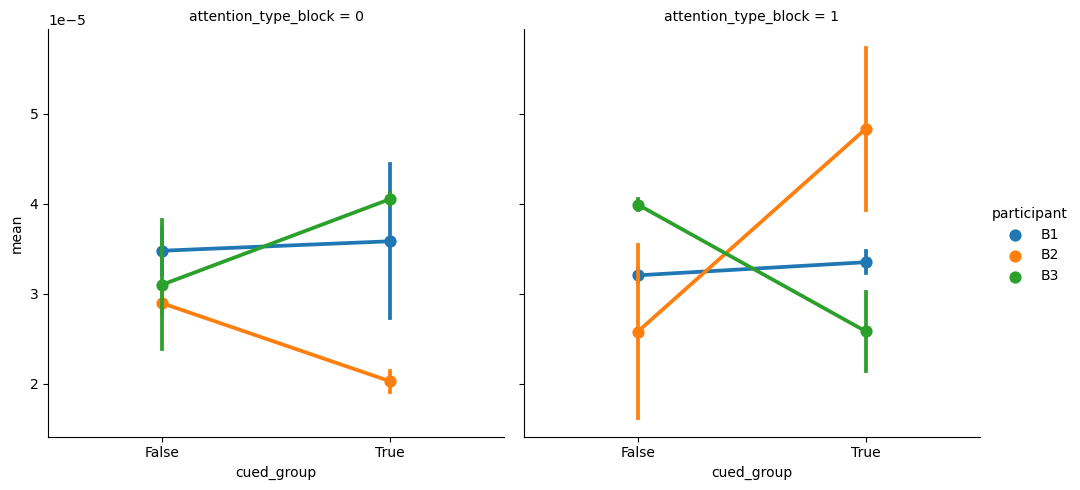

In [85]:
sns.catplot(y='mean', x='cued_group', col='attention_type_block',  hue='participant',
            data=snrs_exp2, kind='point')

In [86]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
snrs_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_trialaveraged_diff-to-baseline.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp2.append(df_participant)
snrs_exp2 = pd.concat(snrs_exp2)
snrs_exp2['cued_group'] = (snrs_exp2['freq'] == snrs_exp2['cued_tag'])

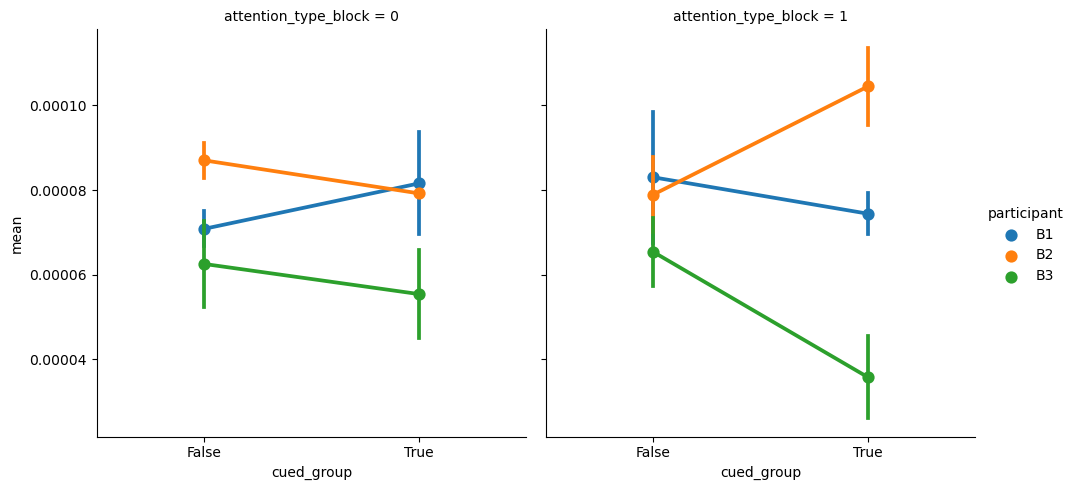

In [87]:
sns.catplot(y='mean', x='cued_group', col='attention_type_block',  hue='participant',
            data=snrs_exp2, kind='point')

In [57]:
participants = ['B1', 'B2','B3'] 
column_names = [
    '60cued_tag_60_attention_0',
    '60cued_tag_64_attention_0',
    '60cued_tag_60_attention_1',
    '60cued_tag_64_attention_1',
    '64cued_tag_60_attention_0',
    '64cued_tag_64_attention_0',
    '64cued_tag_60_attention_1',
    '64cued_tag_64_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_bytrial_diff-to-baseline.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    npsds.append(df_participant)
npsds = pd.concat(npsds)
npsds['Frequency'] = df_participant['variable'].str[:2]
npsds['Cued tag'] = df_participant['variable'].str[11:13]
npsds['Attention'] = df_participant['variable'].str[-1]
npsds['cued_group'] = (npsds['Frequency'] == npsds['Cued tag'])

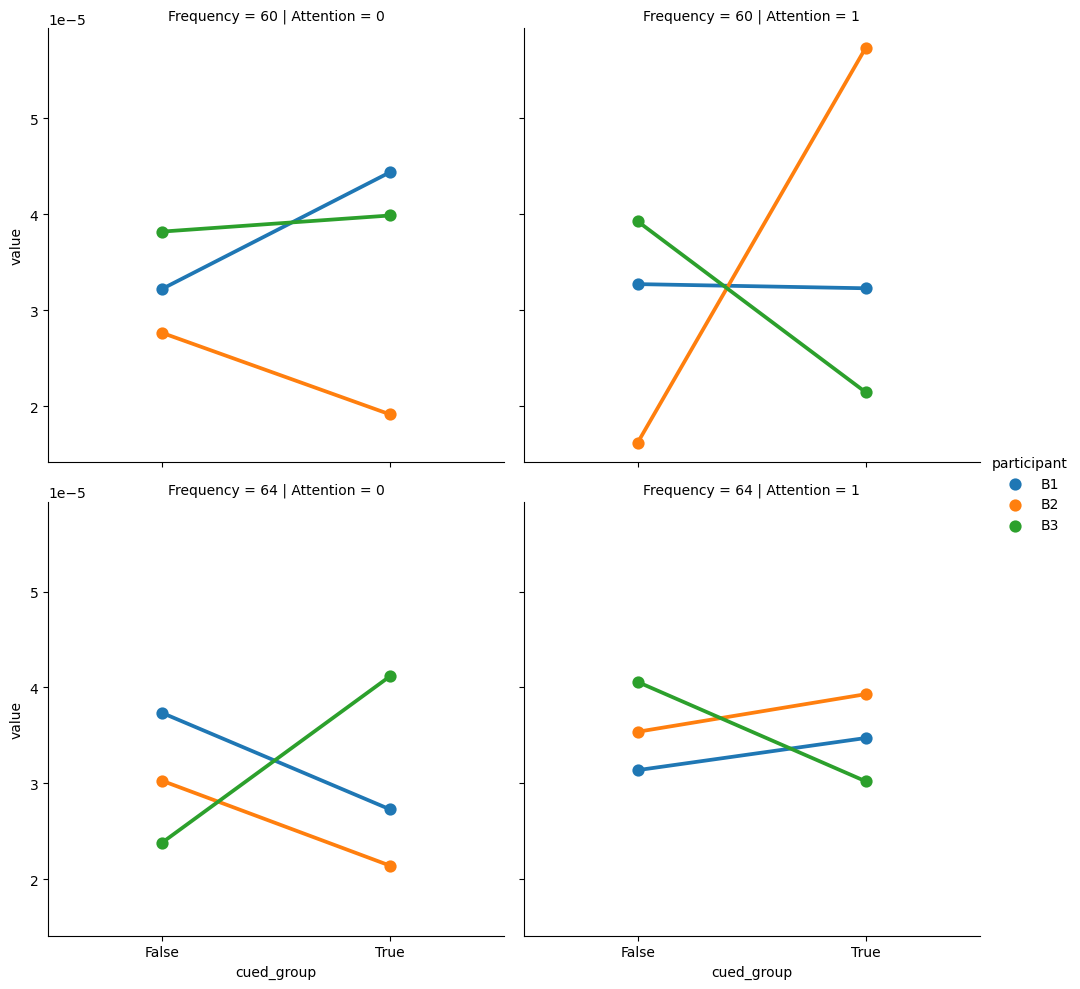

In [58]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant',  row='Frequency', 
            data=npsds, kind='point')

In [59]:
participants = ['B1', 'B2','B3'] 
column_names = [
    '60cued_tag_60_attention_0',
    '60cued_tag_64_attention_0',
    '60cued_tag_60_attention_1',
    '60cued_tag_64_attention_1',
    '64cued_tag_60_attention_0',
    '64cued_tag_64_attention_0',
    '64cued_tag_60_attention_1',
    '64cued_tag_64_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_trialaveraged_diff-to-baseline.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    npsds.append(df_participant)
npsds = pd.concat(npsds)
npsds['Frequency'] = df_participant['variable'].str[:2]
npsds['Cued tag'] = df_participant['variable'].str[11:13]
npsds['Attention'] = df_participant['variable'].str[-1]
npsds['cued_group'] = (npsds['Frequency'] == npsds['Cued tag'])

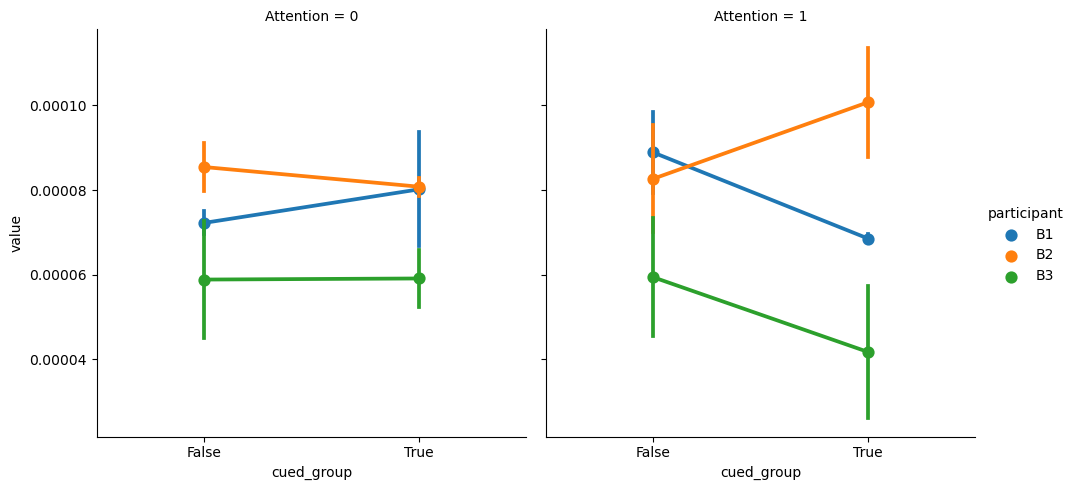

In [60]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant',  data=npsds, kind='point')

In [238]:
# snrs 
participants = ['A0', 'A1', 'A2'] 
snrs_exp1 = []
for participant in participants:
    df_participant = pd.read_csv(f'/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/
    my_code_expe1/notebooks/files/{participant}_snrs_top6.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp1.append(df_participant)
snrs_exp1 = pd.concat(snrs_exp1)
snrs_exp1

SyntaxError: unterminated f-string literal (detected at line 5) (2871943656.py, line 5)

In [239]:
# snrs 
participants = ['B1', 'B2', 'B3'] 
snrs_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_snrs_top6.csv', index_col=False)
    df_participant['participant'] = participant
    snrs_exp2.append(df_participant)
snrs_exp2 = pd.concat(snrs_exp2)
snrs_exp2

,electrode,variable,value,frequency,participant
0,P1,0,NaN,1.0,B1
1,POz,0,NaN,1.0,B1
2,Pz,0,NaN,1.0,B1
3,PO3,0,NaN,1.0,B1
4,P2,0,NaN,1.0,B1
...,...,...,...,...,...
535,POz,89,NaN,90.0,B3
536,PO4,89,NaN,90.0,B3
537,CP1,89,NaN,90.0,B3
538,P1,89,NaN,90.0,B3


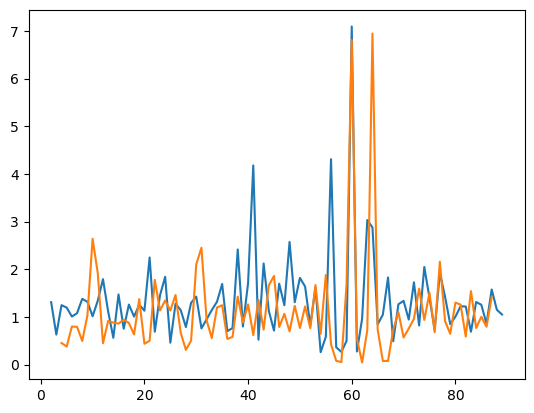

In [39]:
plt.plot(snrs_exp1.groupby(['frequency']).value.mean())
plt.plot(snrs_exp2.groupby(['frequency']).value.mean())

In [40]:
exp1_60 = snrs_exp1[snrs_exp1.frequency == 60].groupby(['participant']).value.mean().reset_index()
exp1_60['experiment'] = 0
exp2_60 = snrs_exp2[snrs_exp2.frequency == 60].groupby(['participant']).value.mean().reset_index()
exp2_60['experiment'] = 1
print(f'T-test for SNRs at 60Hz:{scipy.stats.ttest_ind(exp1_60.value,exp2_60.value)}')


T-test for SNRs at 60Hz:TtestResult(statistic=0.1392853890510824, pvalue=0.8959560371036095, df=4.0)


In [111]:
# snrs 
participants = ['A0', 'A1', 'A2'] 
ITcoh_exp1 = []
for participant in participants:
    df_participant = pd.read_csv(f'/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1/notebooks/files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh_exp1.append(df_participant)
ITcoh_exp1 = pd.concat(ITcoh_exp1)
ITcoh_exp1['cued_group'] = (ITcoh_exp1['coh_with'] == ITcoh_exp1['cued'])
#Average over electrodes
ITcoh_exp1 = ITcoh_exp1[(ITcoh_exp1.coh_with == 60) & (ITcoh_exp1.cued == 60)]
ITcoh_exp1 = ITcoh_exp1.groupby(['participant','time']).ITcoherence.mean().reset_index()
ITcoh_exp1['condition'] = 1

In [118]:
participants = ['B1'] 
ITcoh_exp2 = []
for participant in participants:
    df_participant = pd.read_csv(f'files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh_exp2.append(df_participant)
ITcoh_exp2 = pd.concat(ITcoh_exp2)
ITcoh_exp2['cued_group'] = (ITcoh_exp2['coh_with'] == ITcoh_exp2['cued'])
#Average over electrodes
ITcoh_exp2 = ITcoh_exp2[(ITcoh_exp2.coh_with == 60) & (ITcoh_exp2.cued == 60)]
# ITcoh_exp2 = ITcoh_exp2.groupby(['participant','condition','time']).ITcoherence.mean().reset_index()
# ITcoh_exp2['Experiment'] = 2
ITcoh_exp2


,channel,cued,coh_with,condition,timepoint,ITcoherence,time,participant,cued_group
0,P1,60,60,endo,0,2.900050e-11,-1.0,B1,True
1,POz,60,60,endo,0,4.795661e-11,-1.0,B1,True
2,Pz,60,60,endo,0,3.527068e-11,-1.0,B1,True
3,PO3,60,60,endo,0,3.384828e-11,-1.0,B1,True
4,P2,60,60,endo,0,3.628741e-11,-1.0,B1,True
...,...,...,...,...,...,...,...,...,...
122905,POz,60,60,exo,4096,5.791751e-11,1.0,B1,True
122906,Pz,60,60,exo,4096,3.875053e-11,1.0,B1,True
122907,PO3,60,60,exo,4096,3.091057e-11,1.0,B1,True
122908,P2,60,60,exo,4096,3.686645e-11,1.0,B1,True


In [119]:
ITcoh = pd.concat([ITcoh_exp1, ITcoh_exp2])
ITcoh

,participant,time,ITcoherence,condition,channel,cued,coh_with,timepoint,cued_group
0,A0,-1.000000,3.756497e+01,1,NaN,NaN,NaN,NaN,NaN
1,A0,-0.999512,3.771349e+01,1,NaN,NaN,NaN,NaN,NaN
2,A0,-0.999023,3.784190e+01,1,NaN,NaN,NaN,NaN,NaN
3,A0,-0.998535,3.795019e+01,1,NaN,NaN,NaN,NaN,NaN
4,A0,-0.998047,3.803838e+01,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
122905,B1,1.000000,5.791751e-11,exo,POz,60.0,60.0,4096.0,True
122906,B1,1.000000,3.875053e-11,exo,Pz,60.0,60.0,4096.0,True
122907,B1,1.000000,3.091057e-11,exo,PO3,60.0,60.0,4096.0,True
122908,B1,1.000000,3.686645e-11,exo,P2,60.0,60.0,4096.0,True


/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

<Axes: xlabel='time', ylabel='ITcoherence'>

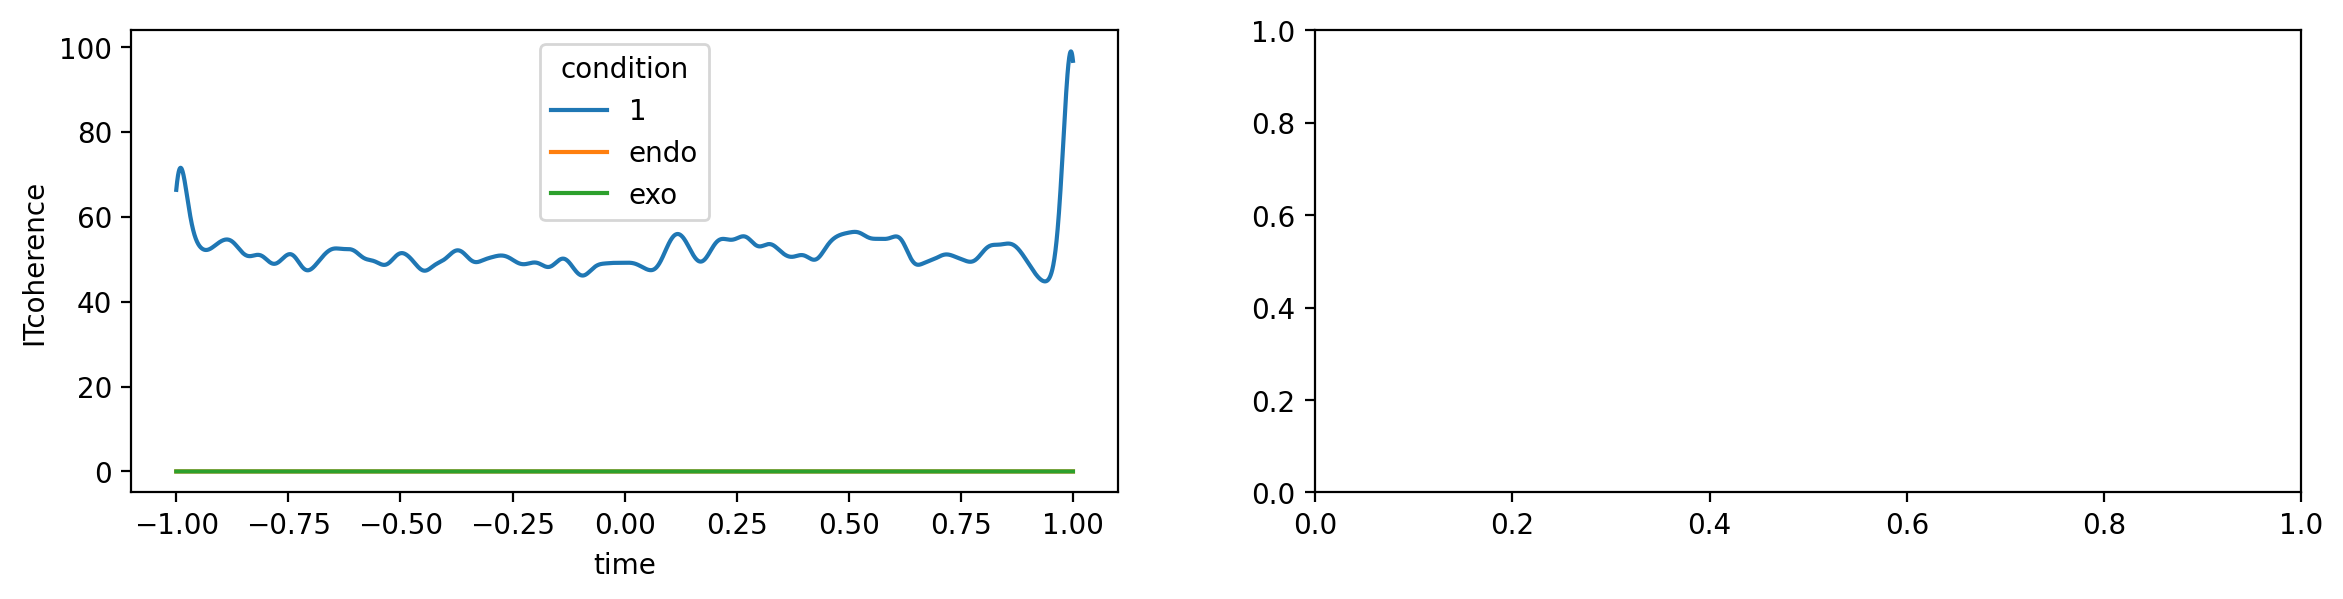

In [120]:
fig, ax = plt.subplots(1,2, figsize=(14,3),dpi=200)
sns.lineplot(y='ITcoherence', hue='condition', x='time', data=ITcoh, errorbar=None, ax=ax[0])


# 1. Frequency tagging
## 1.1 Testing cueing effect on normalized amplitude

In [265]:
participants = ['B1', 'B2','B3'] 
column_names = [
    '60cued_tag_60_attention_0',
    '60cued_tag_64_attention_0',
    '60cued_tag_60_attention_1',
    '60cued_tag_64_attention_1',
    '64cued_tag_60_attention_0',
    '64cued_tag_64_attention_0',
    '64cued_tag_60_attention_1',
    '64cued_tag_64_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_normalizes_psds.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    npsds.append(df_participant)
npsds = pd.concat(npsds)
npsds['Frequency'] = df_participant['variable'].str[:2]
npsds['Cued tag'] = df_participant['variable'].str[11:13]
npsds['Attention'] = df_participant['variable'].str[-1]
npsds['cued_group'] = (npsds['Frequency'] == npsds['Cued tag'])

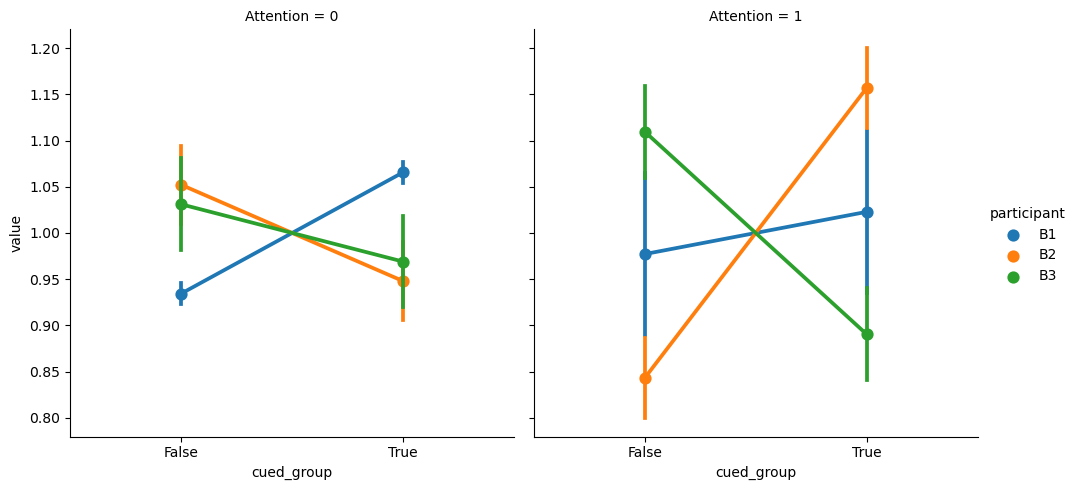

In [266]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant', data=npsds, kind='point')

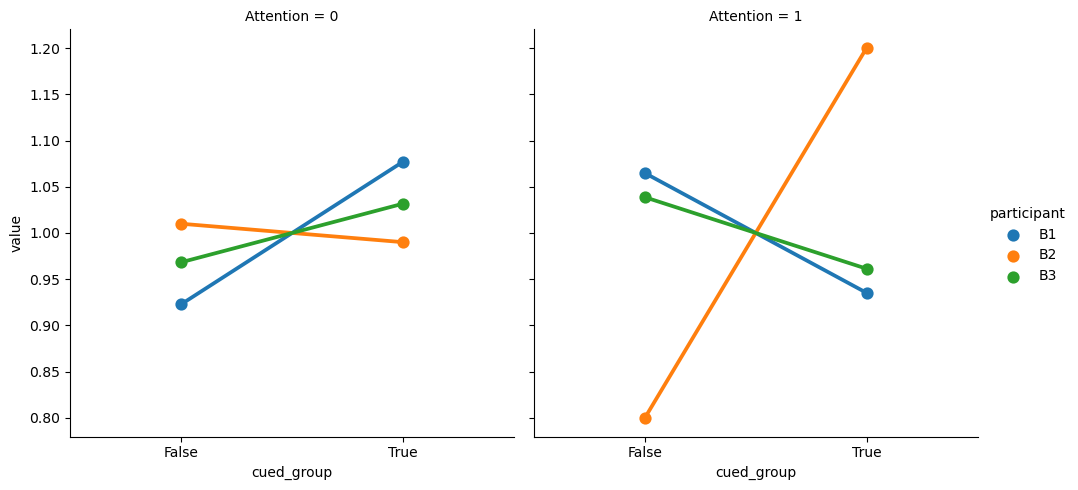

In [263]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant', data=npsds[npsds.Frequency == '60'], kind='point')

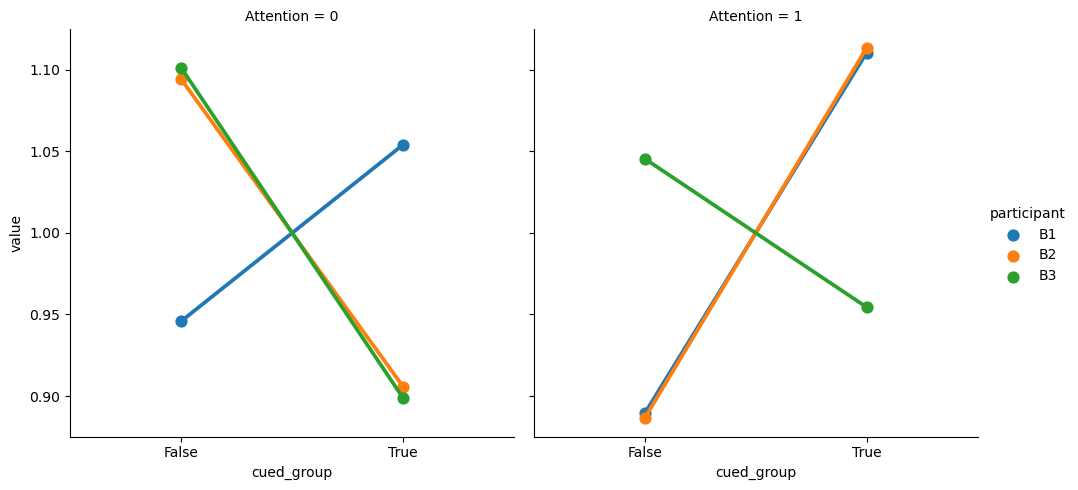

In [264]:
sns.catplot(y='value', x='cued_group', col='Attention', hue='participant', data=npsds[npsds.Frequency == '64'], kind='point')

In [176]:
path_exp1 = '/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1/notebooks/'
participants = ['A0', 'A1','A2'] 
column_names = [
    '56cued_tag_56_attention_1',
    '56cued_tag_60_attention_1',
    '60cued_tag_60_attention_1',
    '60cued_tag_56_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'{path_exp1}files/{participant}_normalizes_psds_pre_stim.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    npsds.append(df_participant)
npsds = pd.concat(npsds)
# npsds.columns = ['cued','uncued']
# npsds['participant'] = participants
# npsds = npsds.melt(id_vars='participant')
# npsds.columns = ['participant', 'Cueing','Normalized amplitude']
# npsds['cue_bin'] = 
# npsds['Cueing'] = npsds['Cueing'].replace({'cued': 'Cued', 'uncued': 'Uncued'})
npsds['Frequency'] = df_participant['variable'].str[:2]
npsds['Cued tag'] = df_participant['variable'].str[11:13]
npsds['Attention'] = df_participant['variable'].str[-1]
npsds['cued_group'] = (npsds['Frequency'] == npsds['Cued tag'])

npsds

,variable,value,participant,Frequency,Cued tag,Attention,cued_group
0,56cued_tag_56_attention_1,0.908971,A0,56,56,1,True
1,56cued_tag_60_attention_1,1.091029,A0,56,60,1,False
2,60cued_tag_60_attention_1,0.954134,A0,60,60,1,True
3,60cued_tag_56_attention_1,1.045866,A0,60,56,1,False
0,56cued_tag_56_attention_1,1.185364,A1,56,56,1,True
1,56cued_tag_60_attention_1,0.814636,A1,56,60,1,False
2,60cued_tag_60_attention_1,1.049134,A1,60,60,1,True
3,60cued_tag_56_attention_1,0.950866,A1,60,56,1,False
0,56cued_tag_56_attention_1,0.927006,A2,56,56,1,True
1,56cued_tag_60_attention_1,1.072994,A2,56,60,1,False


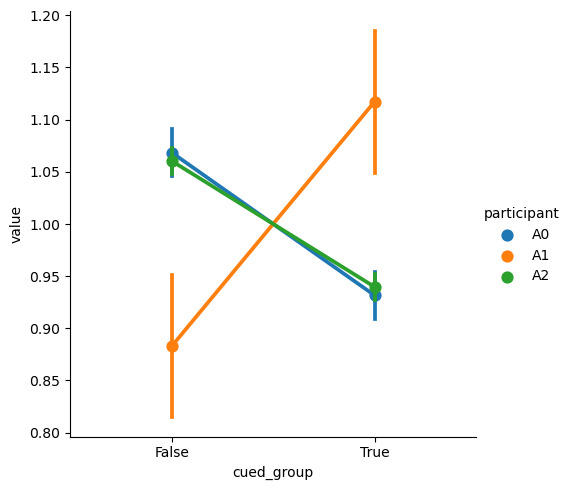

In [178]:
sns.catplot(y='value', x='cued_group', hue='participant',  data=npsds, kind='point')

For an attentional effect, we expect the left plot to decrease and the right one to increase. Standard deviation are between the electrodes. 

In [ ]:
npsds.columns = ['participant', 'Cueing','value','cue_bin']
npsds

In [ ]:
md = smf.mixedlm("value ~ cue_bin", npsds, groups=npsds["participant"])
mdf = md.fit()
print(mdf.summary())

## 1.2 IT coherence

In [4]:
participants = ['B1', 'B2', 'B3'] 
ITcoh = []
for participant in participants:
    df_participant = pd.read_csv(f'files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh.append(df_participant)
ITcoh = pd.concat(ITcoh)
ITcoh['cued_group'] = (ITcoh['coh_with'] == ITcoh['cued'])
#Average over electrodes
ITcoh = ITcoh.groupby(['participant','cued_group','coh_with','condition','time']).ITcoherence.mean().reset_index()
ITcoh

,participant,cued_group,coh_with,condition,time,ITcoherence
0,B1,False,60,endo,-1.000000,0.116239
1,B1,False,60,endo,-0.999512,0.116005
2,B1,False,60,endo,-0.999023,0.115765
3,B1,False,60,endo,-0.998535,0.115520
4,B1,False,60,endo,-0.998047,0.115270
...,...,...,...,...,...,...
98323,B3,True,64,exo,0.998047,0.099403
98324,B3,True,64,exo,0.998535,0.099107
98325,B3,True,64,exo,0.999023,0.098810
98326,B3,True,64,exo,0.999512,0.098500


/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

<Axes: xlabel='time', ylabel='ITcoherence'>

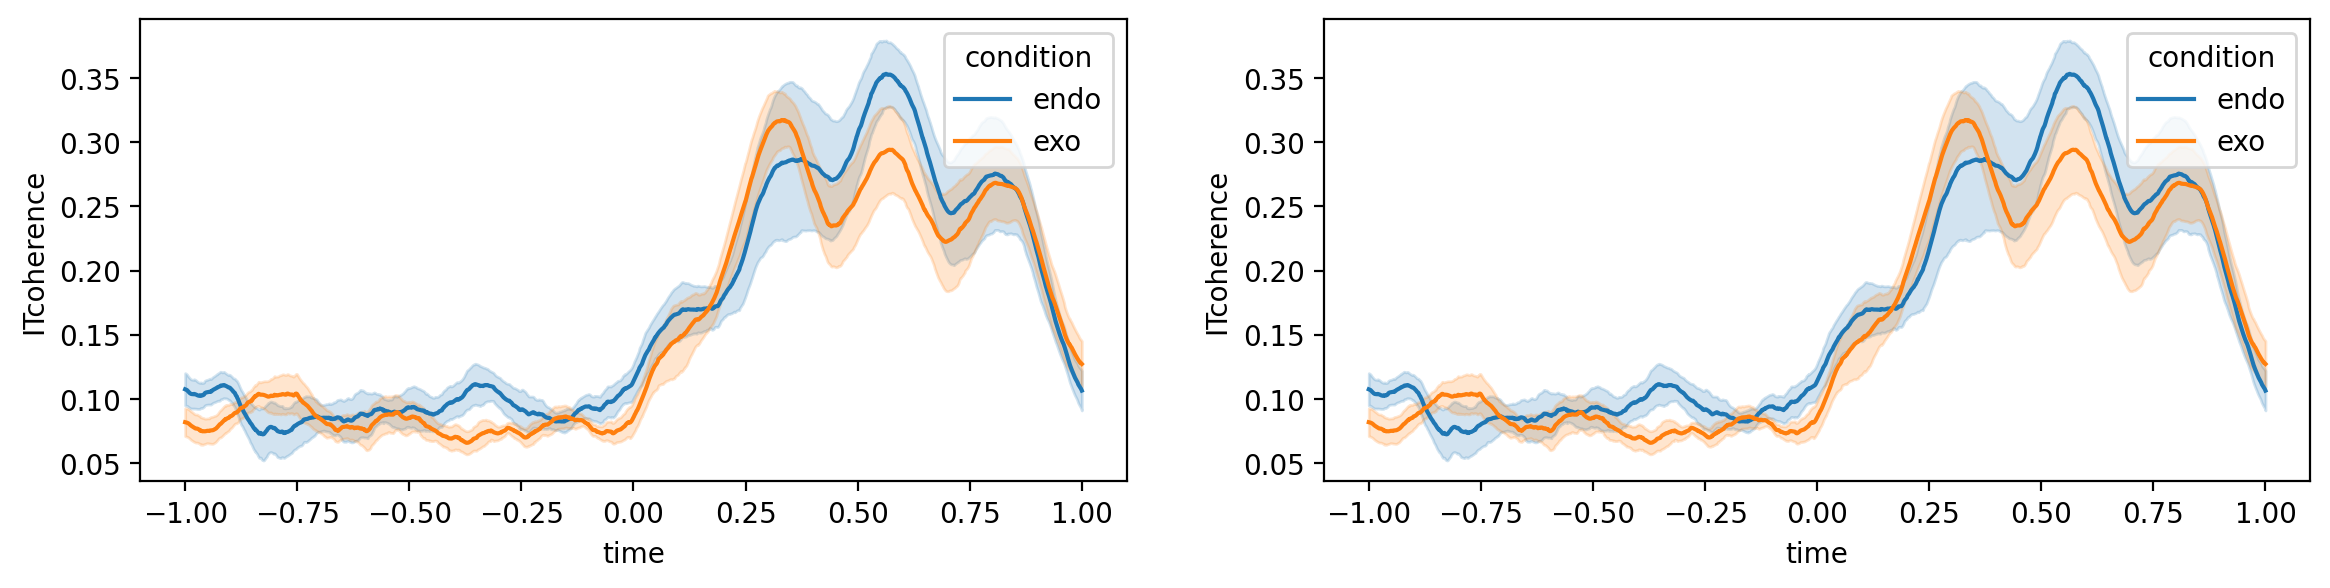

In [5]:
fig, ax = plt.subplots(1,2, figsize=(14,3),dpi=200)
sns.lineplot(y='ITcoherence', hue='condition', x='time', data=ITcoh[ITcoh.cued_group == True], errorbar='se', ax=ax[0])
sns.lineplot(y='ITcoherence', hue='condition', x='time', data=ITcoh[ITcoh.cued_group == True], errorbar='se', ax=ax[1])

In [6]:
ITcoh_stim_onset = ITcoh[ITcoh.time == 1]
ITcoh_stim_onset['cued'] = (ITcoh_stim_onset['coh_with'] == ITcoh_stim_onset['cued']).astype(int)
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 56, 'coh_with'] = 0
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 60, 'coh_with'] = 1
print(ITcoh_stim_onset)

KeyError: 'cued'

In [ ]:
md = smf.mixedlm("ITcoherence ~ cued", ITcoh_stim_onset, groups=ITcoh_stim_onset["participant"])
mdf = md.fit()
print(mdf.summary())

# 2. Decoding

In [7]:
participants = ['B1', 'B2', 'B3'] 
target_period = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_target_period.csv', index_col=False)
    df_participant['participant'] = participant
    target_period.append(df_participant)
target_period = pd.concat(target_period)

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

(0.4, 0.85)

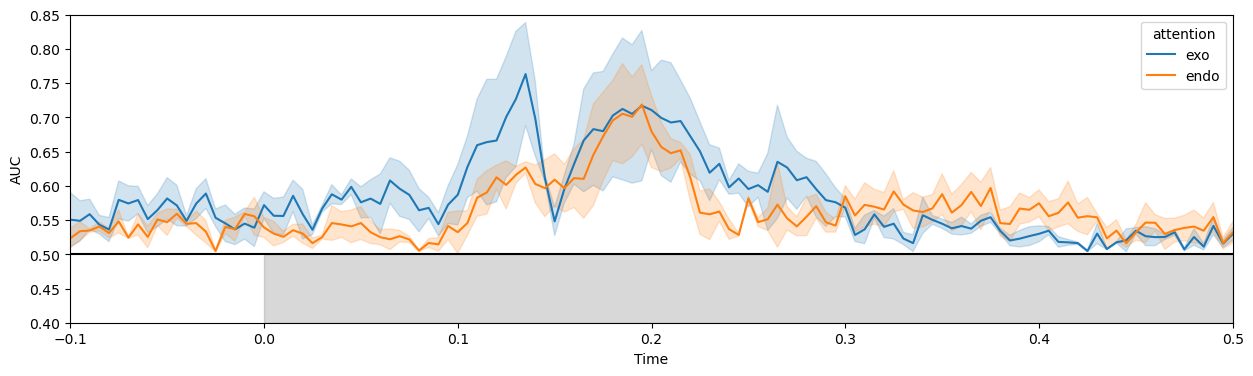

In [8]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=target_period, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.5)
plt.fill_betweenx([0.4, 0.5], 0, 0.5, color='gray', alpha=0.3)
plt.ylim(.4, .85)


In [39]:
exo_data = target_period[target_period.attention == 'exo']
endo_data = target_period[target_period.attention == 'endo']
# Initialize lists to hold aggregated scores
exo_scores = []
endo_scores = []

# Extract unique time points
time_points = target_period.time.unique()

# Iterate over participants and extract scores
for participant in participants:
    exo_scores.append(exo_data[exo_data.participant == participant].score.values)
    endo_scores.append(endo_data[endo_data.participant == participant].score.values)

# Convert lists to numpy arrays for statistical analysis
exo_scores = np.array(exo_scores)
endo_scores = np.array(endo_scores)

# Perform one-sample permutation cluster test against zero (chance level) for each condition
T_obs_exo, clusters_exo, cluster_p_values_exo, H0_exo = permutation_cluster_1samp_test(exo_scores, n_permutations=1000, threshold=None, tail=0)
T_obs_endo, clusters_endo, cluster_p_values_endo, H0_endo = permutation_cluster_1samp_test(endo_scores, n_permutations=1000, threshold=None, tail=0)


Using a threshold of 4.302653
stat_fun(H1): min=6.531494138324121 max=546.1766536223984
Running initial clustering …
Found 1 cluster


  0%|          | Permuting (exact test) : 0/3 [00:00<?,       ?it/s]

Using a threshold of 4.302653
stat_fun(H1): min=8.68833336062208 max=459.4048673577921
Running initial clustering …
Found 1 cluster


  0%|          | Permuting (exact test) : 0/3 [00:00<?,       ?it/s]

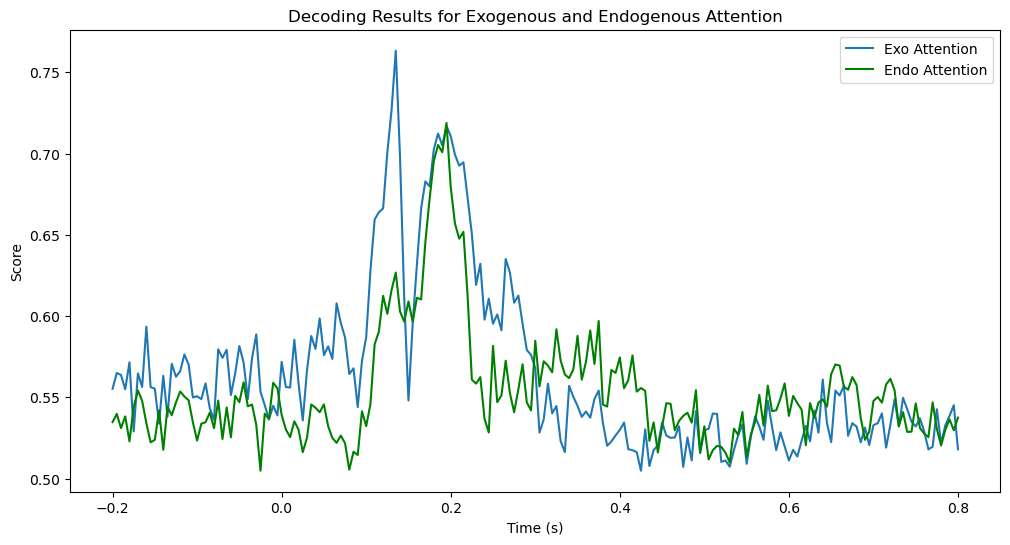

Exo Attention - Significant clusters and their p-values:
Endo Attention - Significant clusters and their p-values:


In [40]:
import matplotlib.pyplot as plt

# Plot the decoding results
plt.figure(figsize=(12, 6))

# Plot Exo Attention
exo_mean_score = exo_scores.mean(axis=0)
plt.plot(time_points, exo_mean_score, label='Exo Attention')
for i, cluster in enumerate(clusters_exo):
    if cluster_p_values_exo[i] < 0.05:
        for c in cluster:
            h = plt.axvspan(time_points[c.start], time_points[c.stop - 1], color='red', alpha=0.3)

# Plot Endo Attention
endo_mean_score = endo_scores.mean(axis=0)
plt.plot(time_points, endo_mean_score, label='Endo Attention', color='green')
for i, cluster in enumerate(clusters_endo):
    if cluster_p_values_endo[i] < 0.05:
        for c in cluster:
            h = plt.axvspan(time_points[c.start], time_points[c.stop - 1], color='blue', alpha=0.3)

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Score')
plt.title('Decoding Results for Exogenous and Endogenous Attention')

plt.show()

# Print significant clusters and their p-values for exo
print("Exo Attention - Significant clusters and their p-values:")
for i, cluster in enumerate(clusters_exo):
    if cluster_p_values_exo[i] < 0.05:
        for c in cluster:
            print(f"Cluster {i}: p-value {cluster_p_values_exo[i]}, Time {time_points[c.start]} to {time_points[c.stop - 1]}")

# Print significant clusters and their p-values for endo
print("Endo Attention - Significant clusters and their p-values:")
for i, cluster in enumerate(clusters_endo):
    if cluster_p_values_endo[i] < 0.05:
        for c in cluster:
            print(f"Cluster {i}: p-value {cluster_p_values_endo[i]}, Time {time_points[c.start]} to {time_points[c.stop - 1]}")


In [33]:
T_obs_exo

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

AttributeError: 'numpy.ndarray' object has no attribute 'start'

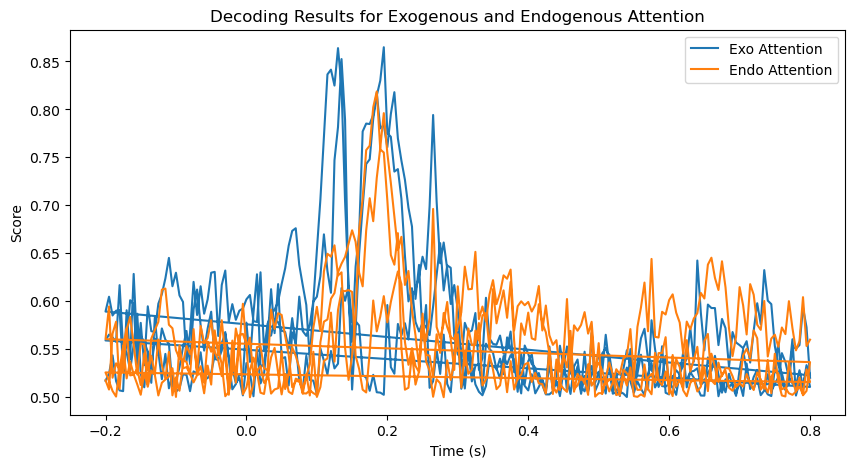

In [14]:
# Plot the decoding results
plt.figure(figsize=(10, 5))
plt.plot(exo_time, exo_score, label='Exo Attention')
plt.plot(endo_time, endo_score, label='Endo Attention')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Score')
plt.title('Decoding Results for Exogenous and Endogenous Attention')

# Highlight significant clusters
for i, c in enumerate(clusters):
    if cluster_p_values[i] < 0.05:
        h = plt.axvspan(exo_time[c[0].start], exo_time[c[0].stop - 1], color='red', alpha=0.3)

plt.show()


### Before the ERP

In [9]:
participants = ['B1', 'B2', 'B3'] 
erps = []
for participant in participants:
    df_participant = pd.read_csv(f'files/erp_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    erps.append(df_participant)
erps = pd.concat(erps)
erps['Voltage'] = erps['erp']
erps['Time'] = erps['time']

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

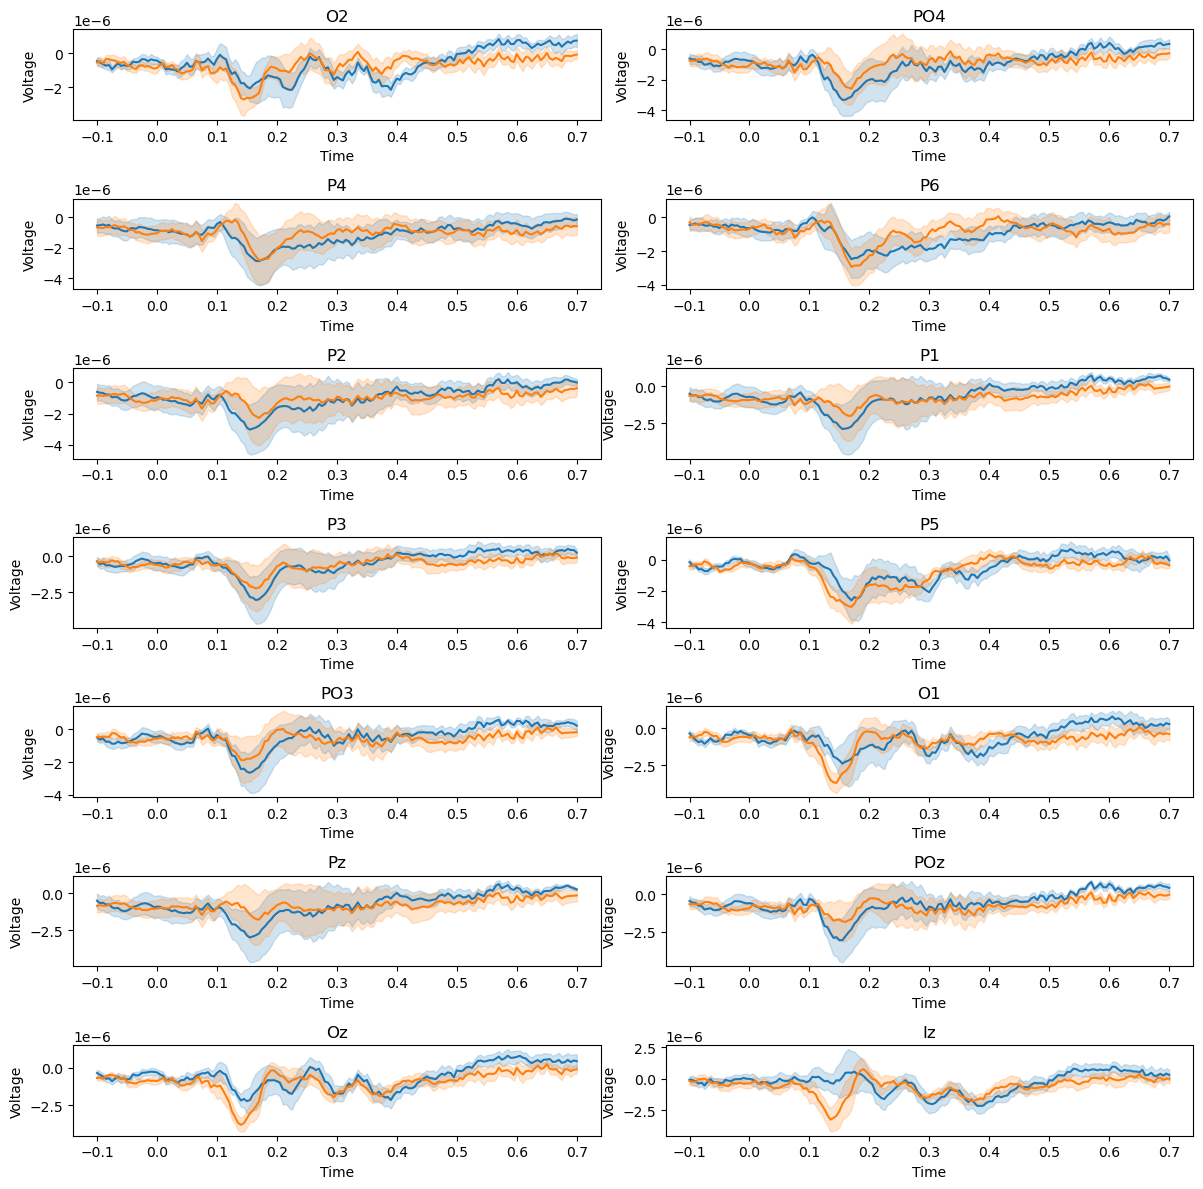

In [10]:
fig, axes = plt.subplots(int(len(erps.channel.unique())/2),2, figsize=(12,12))
axes = axes.flatten()
for ax, e in zip(axes, erps.channel.unique()):
    sns.lineplot(y='Voltage', hue='attention', x='Time', data=erps[erps.channel ==e], errorbar='se', ax=ax, legend=False)
    ax.set_title(e)
plt.tight_layout()

In [ ]:
participants = ['B1', 'B2', 'B3'] 
post_erp = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_post_erp.csv', index_col=False)
    df_participant['participant'] = participant
    post_erp.append(df_participant)
post_erp = pd.concat(post_erp)

In [ ]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=post_erp, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.6)
plt.fill_betweenx([0.4, 0.5], 0.5, 0.6, color='gray', alpha=0.3)
plt.ylim(.4, .85)

In [ ]:
participants = ['B1', 'B2', 'B3'] 
trial_end = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_trial_end.csv', index_col=False)
    df_participant['participant'] = participant
    trial_end.append(df_participant)
trial_end = pd.concat(trial_end)

In [ ]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=trial_end, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.5)
plt.ylim(.4, .85)